# **Иерархическая кластеризация**

✍ Алгоритмов кластеризации настолько много, что по ним можно сделать отдельный курс. И, как вы можете догадаться, не существует такого метода кластеризации, который всегда будет выдавать хорошие результаты — всё зависит от того, с какими данными вы работаете.

На сегодняшний день существует *более 40 видов кластеризации*, но общепринятой системы классификации алгоритмов кластеризации не существует.

В этом и последующих юнитах мы познакомимся с некоторыми популярными алгоритмами кластеризации:

* **иерархической кластеризацией**,
* **EM-алгоритмами кластеризации**,
* **спектральной кластеризацией**,
* **кластеризацией на основе плотности**.

Мы рассмотрим различные подходы, их плюсы и минусы, а также применение.

***
## **ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ**

Принцип иерархической кластеризации основан на построении ***дерева (иерархии) вложенных кластеров***.

![](https://lms.skillfactory.ru/assets/courseware/v1/79e2f856b8817691a6b1fe50b416921e/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_1.png)

**Дендрограмма**  — это древовидная диаграмма, которая содержит ***n*** уровней. Каждый уровень — это шаг укрупнения кластеров.

![](https://lms.skillfactory.ru/assets/courseware/v1/ea3eb84720f60c6be03ccb0b6a9c719f/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_2.png)

Чем больше схожесть между двумя объектами на дендрограмме, тем ниже высота внутренней ветки, которая идёт из объекта или кластера:

![](https://lms.skillfactory.ru/assets/courseware/v1/96d8fa2d5f36508e5915fe258158d2e3/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_3.png)

На дендрограмме выше Сельма и Пэтти Бувье, сёстры Мардж Симпсон, похожи друг на друга, поэтому высота соединяющей их внутренней ветки маленькая, а сама Мардж не похожа на своих сестёр, поэтому высота внутренней ветки гораздо больше.
***

Перейдём к более реальным примерам.

Например, дендрограмма для кластеризации трёх видов ирисов будет выглядеть следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/b5aeab3fc61ad2c6f7c0e3916c7eb2a9/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_4.png)

Справа расположены **листья** дендрограммы. Внизу дендрограммы отложена схожесть объектов. Количество уровней дендрограммы соответствует числу шагов слияния или разделения кластеров. На листьях находятся исходные объекты. Далее мы объединяем эти объекты в маленькие группы — это первый шаг кластеризации. После этого с каждым шагом объекты образуют всё большие и большие кластеры, пока на последнем шаге не образуется один большой кластер (**корень** дендрограммы), содержащий все три вида ирисов. Для определения количества кластеров на каждом шаге мы можем мысленно проводить вертикальную линию и смотреть, сколько внутренних веток пересекла эта линия. 

Наши линии на картинке пересекают две и четыре линии. Это означает, что на этих шагах данные делятся на два или четыре кластера.
***
Если ещё раз посмотреть на график с дендрограммой ирисов, можно сказать, что при кластеризации мы можем пойти снизу вверх (от листьев к корню) или сверху вниз (от корня к листьям). И действительно — при иерархической кластеризации выделяют два подхода: **агломеративный** и **дивизионный**. В первом случае кластеры образуются снизу вверх, т. е. при объединении кластеров, а во втором — сверху вниз, в ходе деления крупных кластеров:

![](https://lms.skillfactory.ru/assets/courseware/v1/17a3629f5ac5b30b3873f06d5c394a00/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_5.png)

***

**Агломеративный метод (agglomerative)**

Новые кластеры создаются в ходе объединения более мелких кластеров:

![](https://lms.skillfactory.ru/assets/courseware/v1/3842c4df18dcf25f0d83a6a39d0ee736/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_6.png)

**Дивизионный (дивизивный) метод (divisive)**

Кластеры создаются при делении крупных кластеров:

![](https://lms.skillfactory.ru/assets/courseware/v1/25433f8dd0456eab40b9870130c9c4f4/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_7.png)


Для того чтобы построить дендрограмму, нужна матрица сходства, построенная на основе расстояний между кластерами.

В общем виде матрица сходства выглядит следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/b08ac8eb355c8baf180eec10e4834c5d/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_8.png)

***K*** — это мера сходства между двумя кластерами. По диагонали в матрице записаны единицы, так как объекты максимально похожи на самих себя.

Чтобы рассчитать данную матрицу, нужно знать расстояния между двумя кластерами. Существуют разные подходы его вычисления, и выбранный подход влияет на результат кластеризации.

**Методы определения расстояния между кластерами:**

![](data/f13.PNG)

В зависимости от того, каким способом рассчитывается расстояние, можно получить разные результаты кластеризации.

На картинке ниже рассматривается иерархическая кластеризация при использовании разных подходов для подсчёта расстояния ↓

![](https://lms.skillfactory.ru/assets/courseware/v1/f7a927787a5afbbcf0395609a1e8a2f4/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_13.png)

В первом столбце представлено использование метода одиночной связи, во втором — метода средней связи, в третьем — метода полной связи.

Различные кластеры обозначены разными цветами: оранжевым, зелёным и синим. 
***
Как видим, иерархическая кластеризация с использованием метода одиночной связи хорошо отрабатывает на первых двух распределениях датасетов, но очень плохо справляется с вытянутыми и перекрывающимися данными. Алгоритм иерархической кластеризации работает по принципу «богатый становится богаче». Это может приводить к неравномерному распределению кластеров. Данный способ больше других страдает от неравномерного распределения кластеров: это можно наблюдать в третьей, четвёртой и шестой строках части Single Linkage на картинке — мы видим очень редкие вкрапления зелёного кластера, а всё остальное пространство принадлежит синему кластеру.

**Использование методов средней связи и полной связи приносит хорошие результаты только при условии, что данные имеют высокую плотность и не пересекаются, или же для однородно распределённых данных. В остальных случаях они отрабатывают плохо.**

### **ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ?**

* **Для построения филогенетического дерева**.

Например, если известна ДНК-последовательность, можно построить филогенетическое дерево.

На рисунке ниже иерархическая кластеризация была проведена на основе ДНК животных:

![](https://lms.skillfactory.ru/assets/courseware/v1/47a344947f15f9050d30cea2ab3c22ab/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_14.png)

* **Для анализа текстов**.

Например, с помощью *кластеризации Брауна* (частный случай иерархической кластеризации) можно сгруппировать слова и найти синонимы. Слова, которые были встроены в похожие контексты и считаются семантически связанными, оказываются в одном кластере:

![](https://lms.skillfactory.ru/assets/courseware/v1/61b8a8108d9c0e9197c983aa22d93f8c/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_15.png)


### **КАК ЗАПУСТИТЬ ИЕРАРХИЧЕСКУЮ КЛАСТЕРИЗАЦИЮ?**

Давайте попробуем кластеризовать датасет с покемонами с помощью иерархической кластеризации.

Запустим алгоритм (такой же, как k-means). Из библиотеки sklearn импортируем алгомеративную кластеризацию, далее запустим метод fit(), передав вектор X из признаков объектов, и обучим модель кластеризации.

In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('data/pokemon.csv')
X = df[['Attack', 'Defense']]


# агломеративная кластеризация
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(X)
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

Базовые параметры, которые необходимо передать в **AgglomerativeClustering**:

* **n_clusters** — количество кластеров; по умолчанию — 2.
* **linkage** — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать single, ward, average complete; по умолчанию используется ward.
  
*Какое количество кластеров задать в начале?*

* Иногда при постановке задачи может быть чётко указано, что необходимо разделить данные на N кластеров. В таком случае проблем не возникнет.
* Если кластеризацию требуется провести по двум-трём признакам, можно визуализировать данные и прикинуть, на сколько кластеров их можно разделить.
* Выбрать какое-нибудь количество кластеров, например три-четыре, провести кластеризацию и визуализировать дендрограмму. Далее, основываясь на дендрограмме, можно примерно определить оптимальное количество кластеров.

Чуть позже мы научимся визуализировать дендрограмму, а сейчас давайте посмотрим на дендрограмму проведённой кластеризации. Попытаемся понять, какое оптимальное количество кластеров для кластеризации нужно выбрать. Дендрограмма получилась большой и сложной для восприятия и понимания. Можно увидеть, что, если мы проведём горизонтальную линию на расстоянии между кластерами, равном 6, данные отлично разделятся на три кластера:

![](https://lms.skillfactory.ru/assets/courseware/v1/ba4997a9cffc7024696505e185db730f/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_16.png)

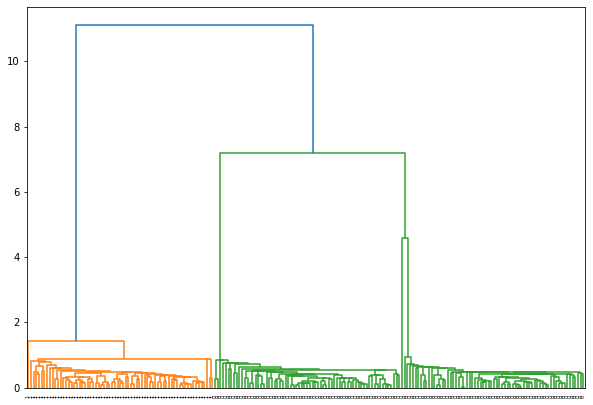

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')


plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=agglomerative_clustering.labels_,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

***
### **ПРЕИМУЩЕСТВА И НЕДОСТАТКИ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ**

**ПРЕИМУЩЕСТВА:**

* Можно построить дендрограмму и понять, как устроены данные.
* Работает на небольшом датасете.

**НЕДОСТАТКИ:**

* Необходимость выбора оптимального количества кластеров.
* Если данных много, дендрограмма становится большой и сложной для понимания.
* Может неравномерно разделять данные на кластеры.